
## Adding libraries for the analysis

In [601]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
import warnings
warnings.filterwarnings('ignore')

In [529]:
pd.set_option('display.max_columns',115)
pd.set_option('display.max_rows',200)

## loading the Housing DataSet

In [530]:
housingDataSet = pd.read_csv('train.csv')
housingDataSet.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [531]:
housingDataSet.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Finding the info and shape of the housing Data Set

In [532]:
housingDataSet.info()
housingDataSet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [533]:


#check the columns of data
housingDataSet.columns



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [534]:


#check the size of data
housingDataSet.size



118260

## Dropping Empty Rows in the Housing Data Set

In [535]:
housingDataSet.dropna(how='all',inplace=True)

## Removing Duplicate Rows from the housing DataSet, If Any

In [536]:


housingDataSet.drop_duplicates()



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

## Dropping empty columns in the housing DataSet

In [537]:
housingDataSet.dropna(how='all',inplace=True,axis=1)

In [538]:
housingDataSet = housingDataSet.drop(['Id'],axis=1)

In [539]:
housingDataSet.shape

(1460, 80)

In [540]:


#check the datatypes of data
housingDataSet.dtypes



MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [541]:
#check the axes of data
housingDataSet.axes

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
            dtype='int64', length=1460),
 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr

## upading NA values in the dataSet category columns as NA has a meaning

In [542]:
NAColumnValues = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [543]:
for col in NAColumnValues:
    housingDataSet[col] = housingDataSet[col].replace(np.nan, 'None')
    print(housingDataSet[col].unique())

['None' 'Grvl' 'Pave']
['Gd' 'TA' 'Ex' 'None' 'Fa']
['TA' 'Gd' 'None' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'None']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']
['RFn' 'Unf' 'Fin' 'None']
['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
['None' 'Ex' 'Fa' 'Gd']
['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['None' 'Shed' 'Gar2' 'Othr' 'TenC']


In [544]:
housingDataSet.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

## Segmenting Categorical And Numerical Columns

In [545]:
category_column = ['CentralAir','Electrical','Functional','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition','MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','Heating']
ordinal_category_column = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']

In [546]:
housingDataSet[category_column].dtypes

CentralAir       object
Electrical       object
Functional       object
GarageType       object
PavedDrive       object
MiscFeature      object
SaleType         object
SaleCondition    object
MSSubClass        int64
MSZoning         object
Street           object
Alley            object
LandContour      object
Utilities        object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
BsmtExposure     object
Heating          object
dtype: object

In [547]:
housingDataSet[ordinal_category_column].isnull().sum()

LotShape        0
LandSlope       0
OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
KitchenQual     0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
dtype: int64

In [548]:
housingDataSet[category_column].isnull().sum()

CentralAir       0
Electrical       1
Functional       0
GarageType       0
PavedDrive       0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MSZoning         0
Street           0
Alley            0
LandContour      0
Utilities        0
LotConfig        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
Foundation       0
BsmtExposure     0
Heating          0
dtype: int64

## Imputing null values with mode values for categorical variables

In [549]:
housingDataSet['Electrical'].fillna(housingDataSet['Electrical'].mode().iloc[0], inplace = True)
housingDataSet['MasVnrType'].fillna(housingDataSet['MasVnrType'].mode().iloc[0], inplace = True)

In [550]:
housingDataSet[category_column].isnull().sum()

CentralAir       0
Electrical       0
Functional       0
GarageType       0
PavedDrive       0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MSZoning         0
Street           0
Alley            0
LandContour      0
Utilities        0
LotConfig        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
Foundation       0
BsmtExposure     0
Heating          0
dtype: int64

## Descriptive Analysis

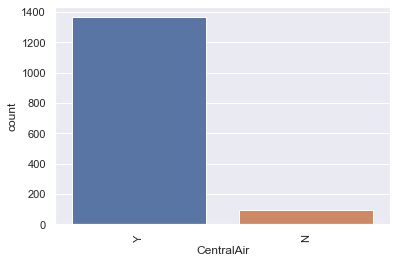

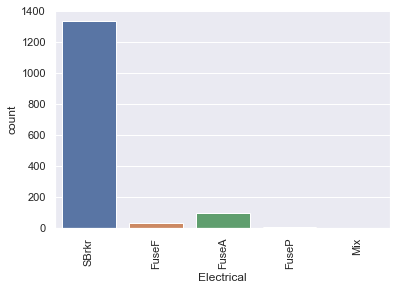

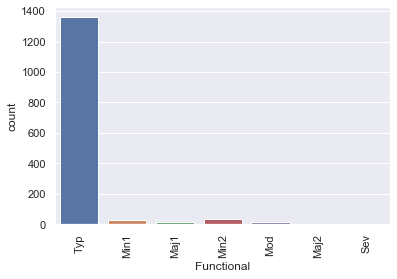

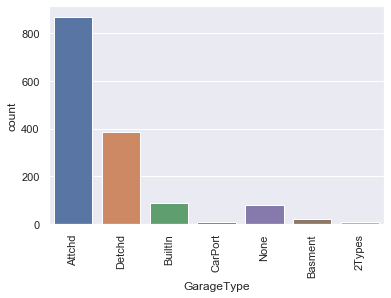

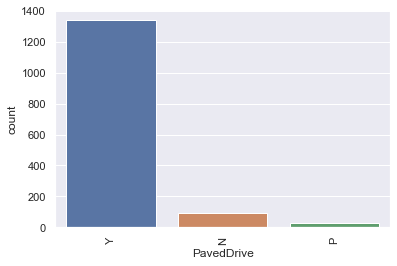

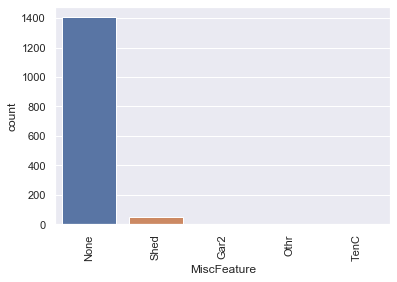

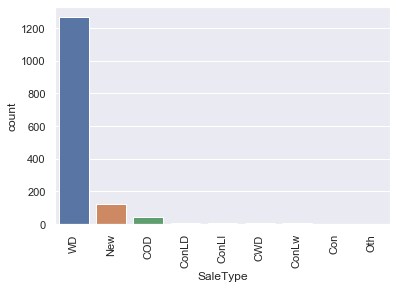

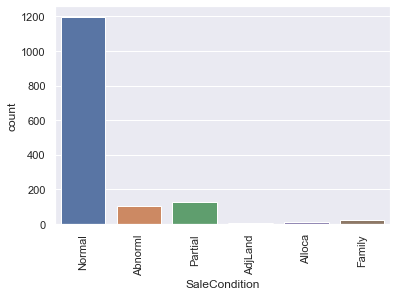

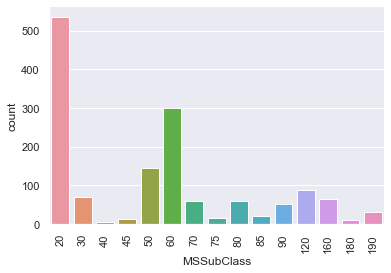

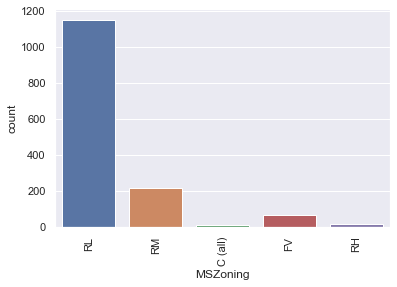

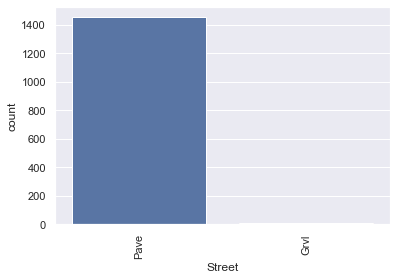

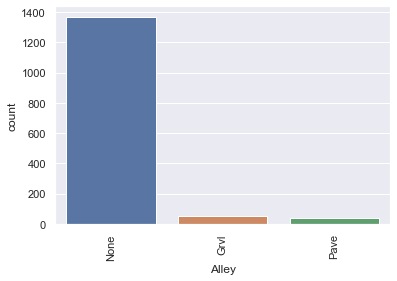

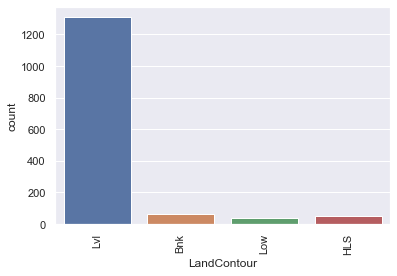

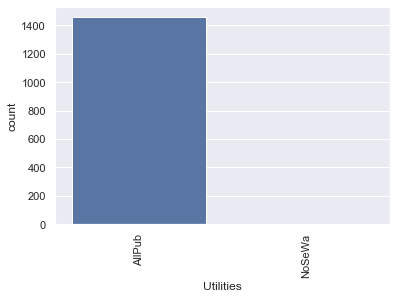

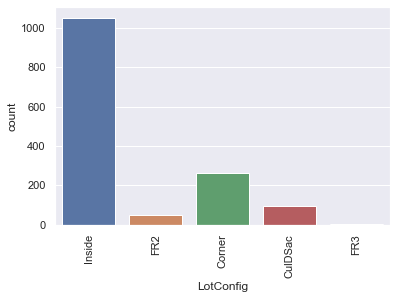

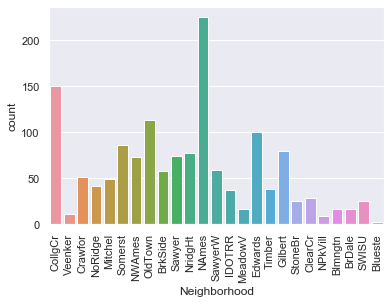

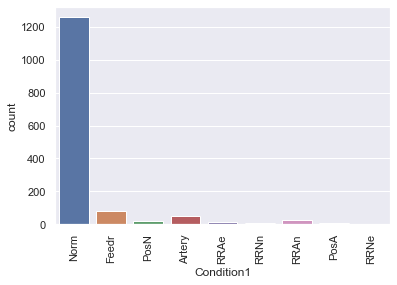

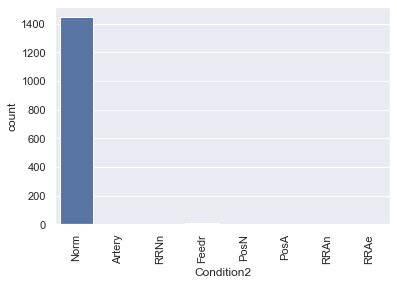

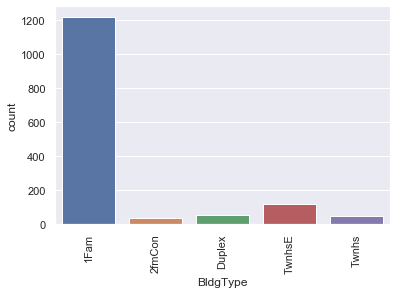

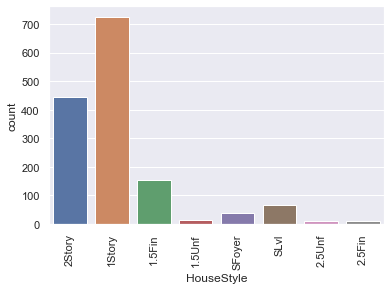

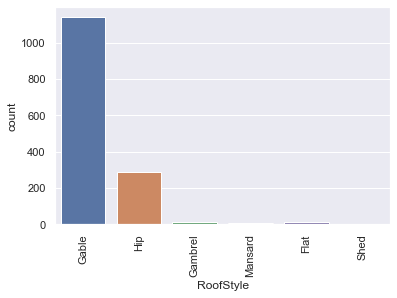

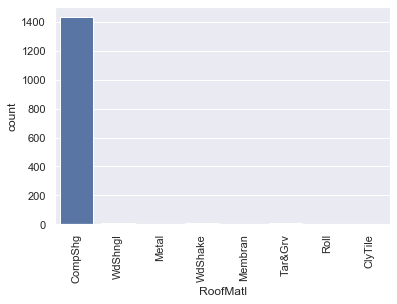

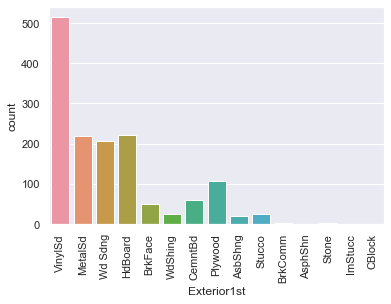

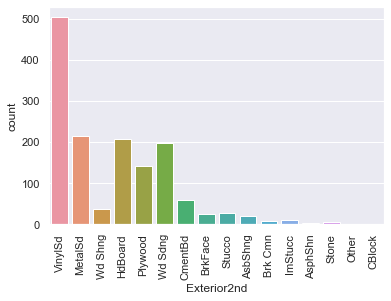

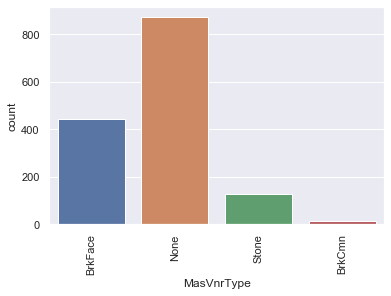

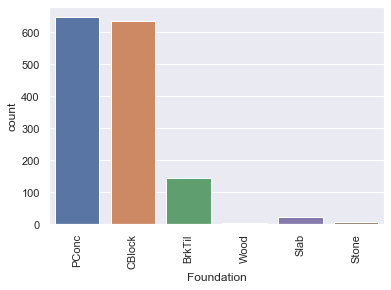

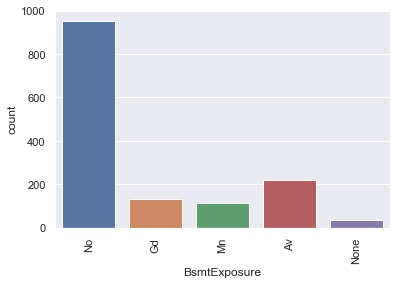

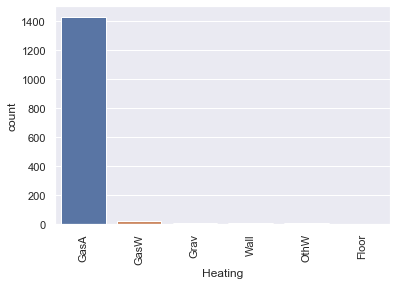

In [551]:
for i in category_column :
    plt.figure()
    sns.countplot(data=housingDataSet, x = i)
    plt.xticks(rotation=90)
    plt.show()

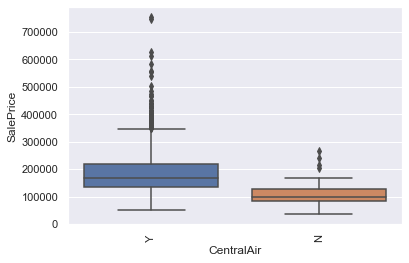

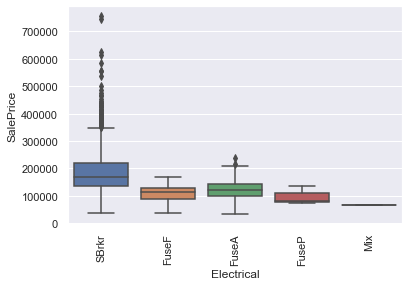

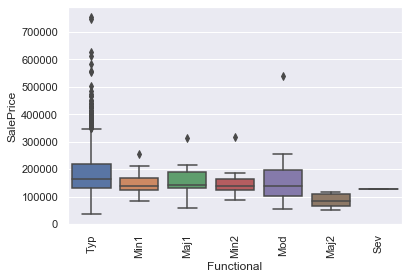

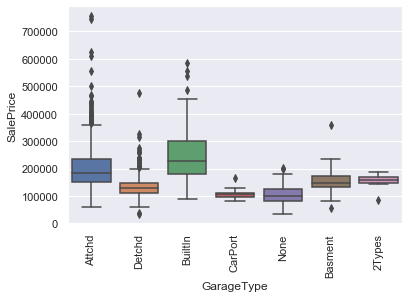

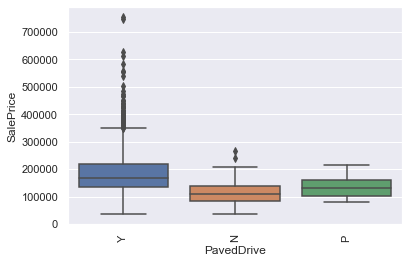

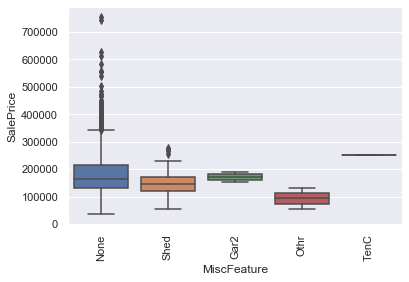

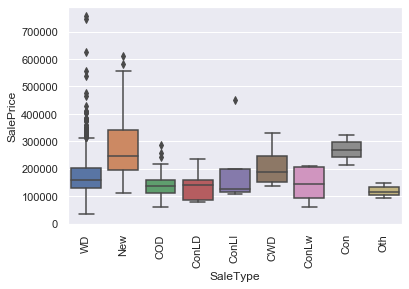

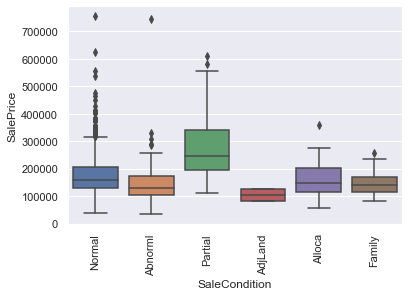

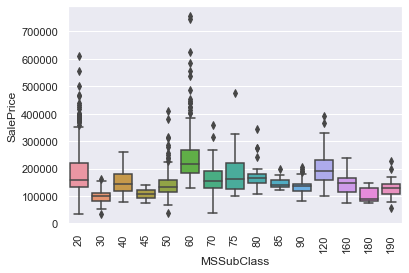

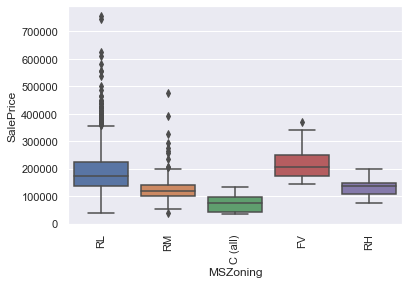

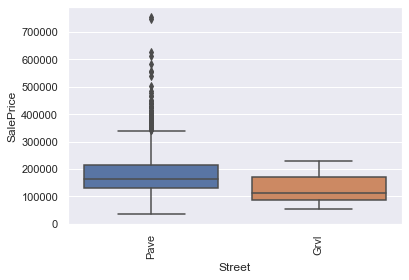

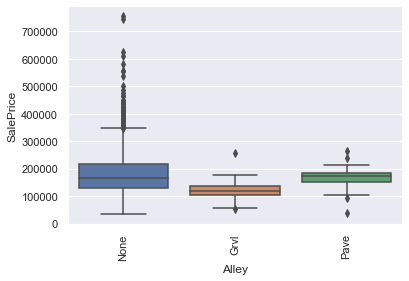

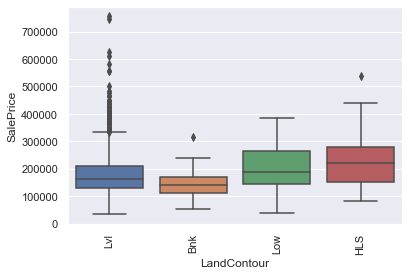

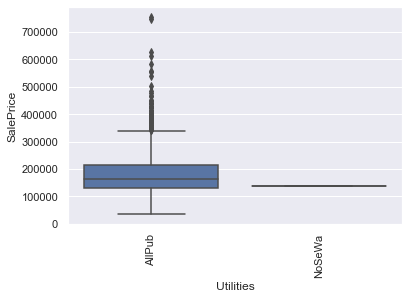

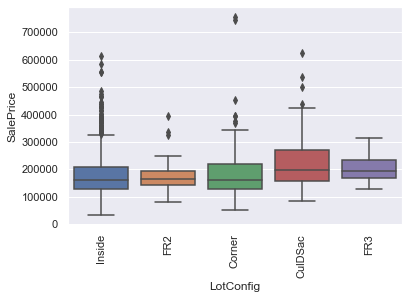

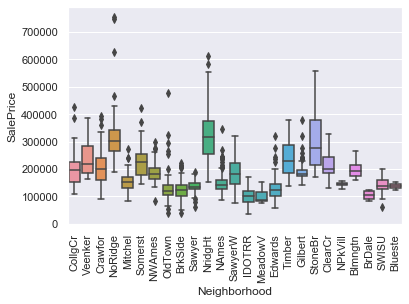

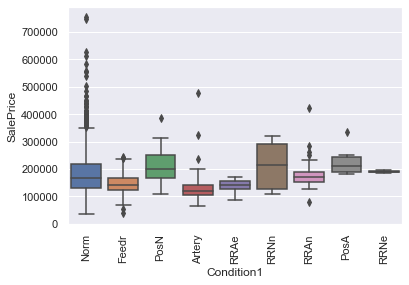

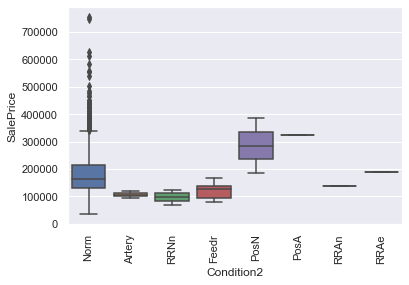

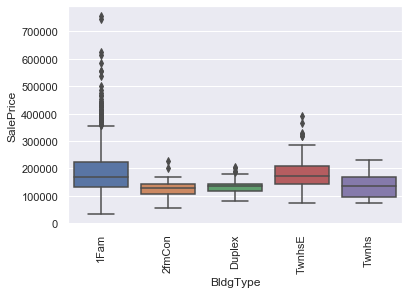

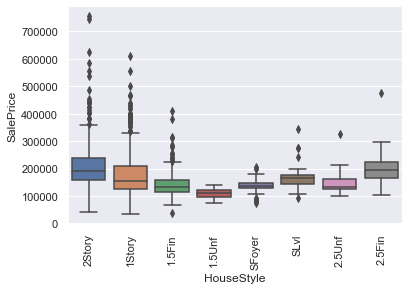

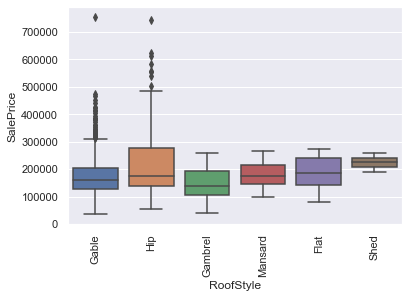

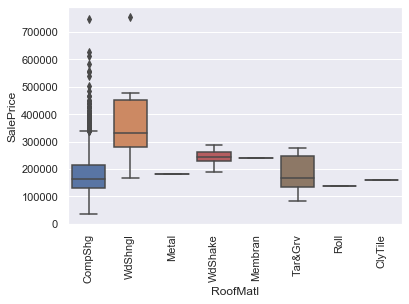

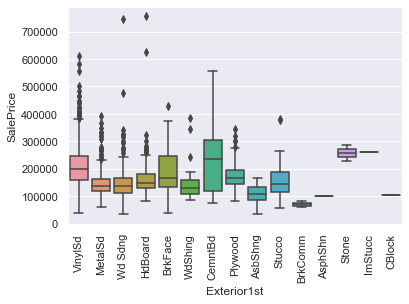

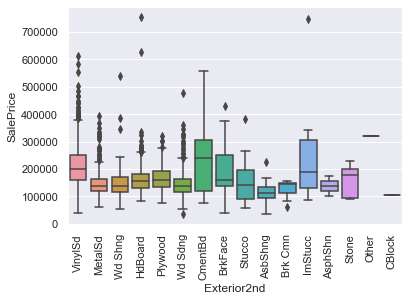

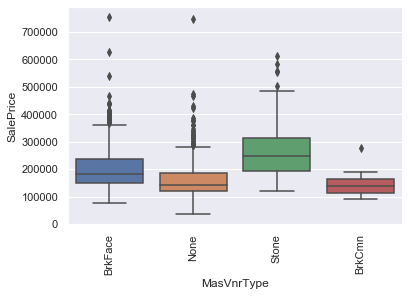

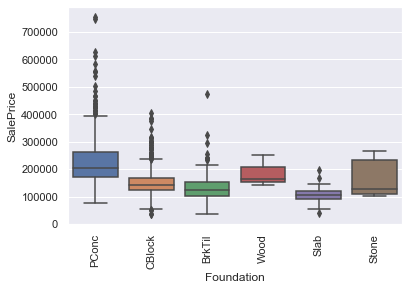

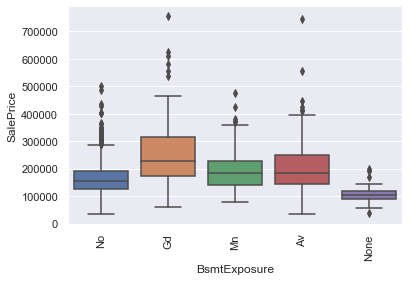

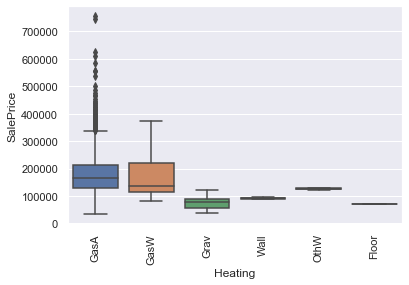

In [552]:
for i in category_column :
    plt.figure()
    sns.boxplot(data=housingDataSet, x = i,y = housingDataSet['SalePrice'])
    plt.xticks(rotation=90)
    plt.show()

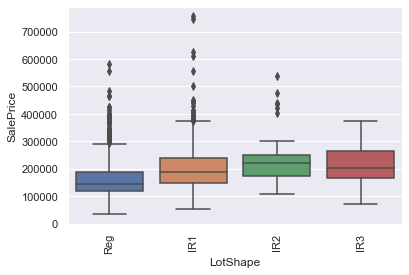

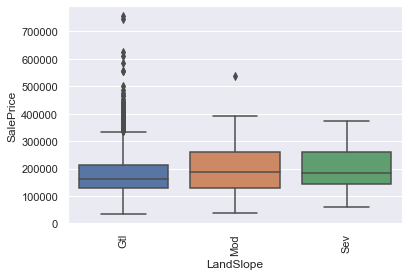

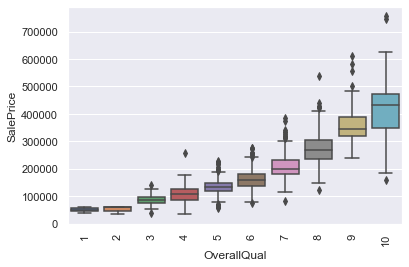

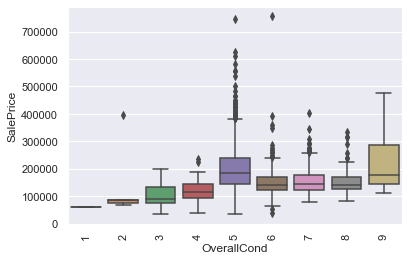

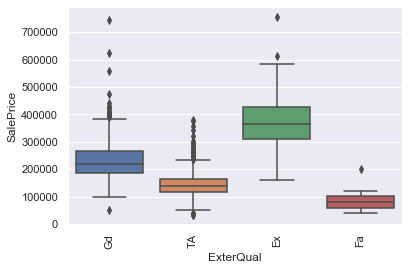

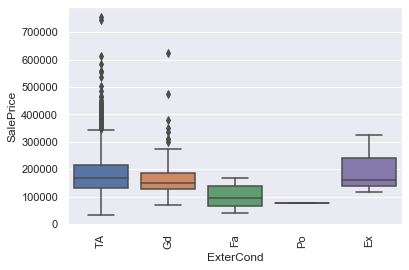

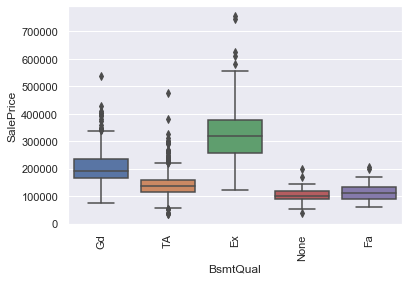

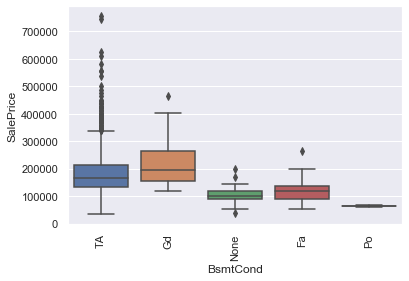

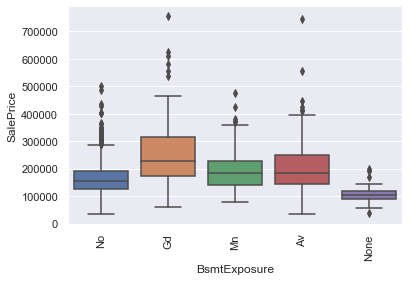

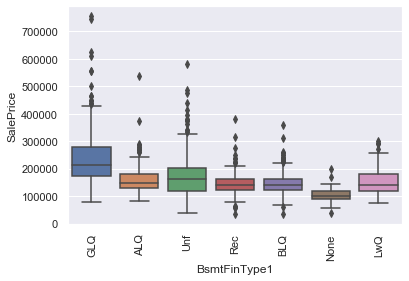

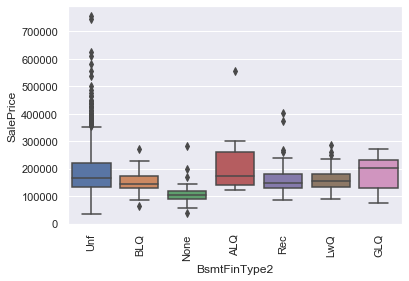

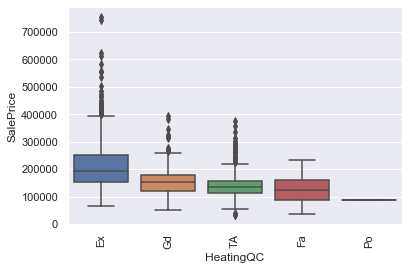

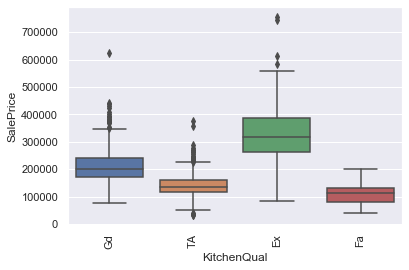

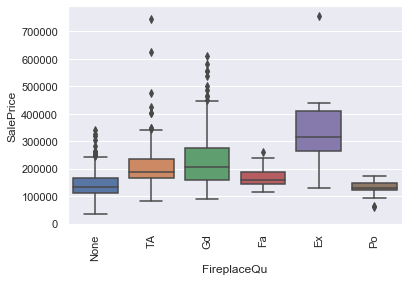

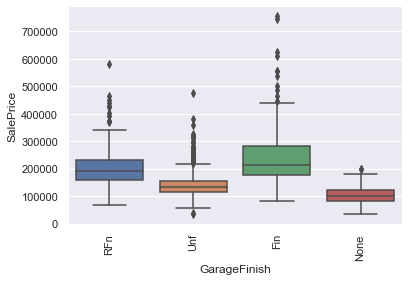

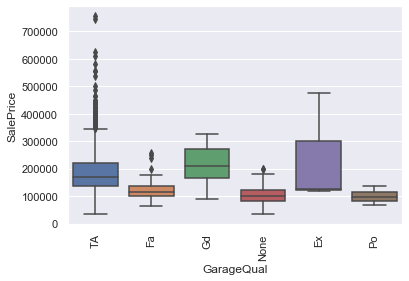

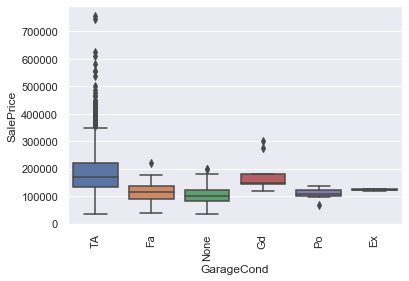

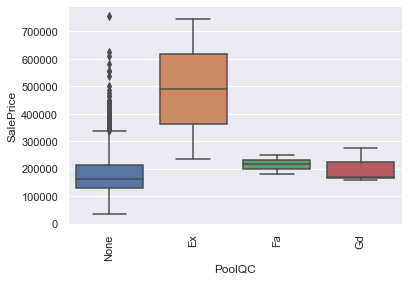

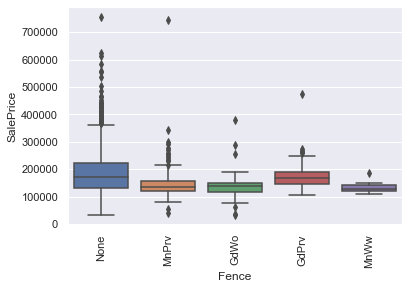

In [553]:
for i in ordinal_category_column :
    plt.figure()
    sns.boxplot(data=housingDataSet, x = i, y = housingDataSet['SalePrice'])
    plt.xticks(rotation=90)
    plt.show()

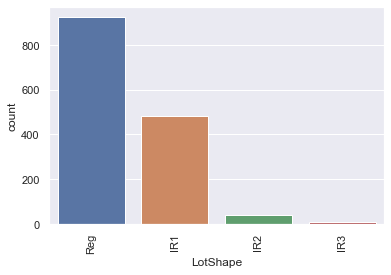

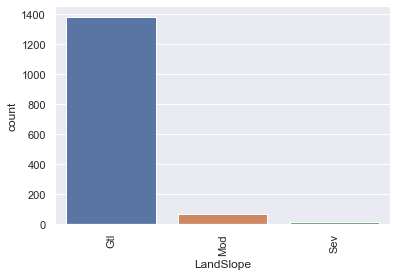

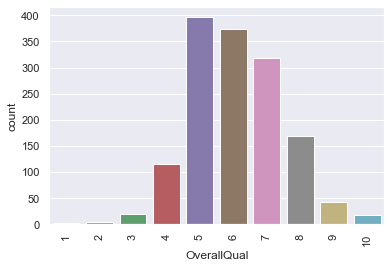

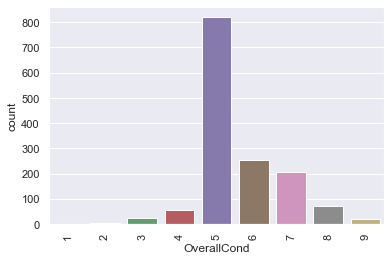

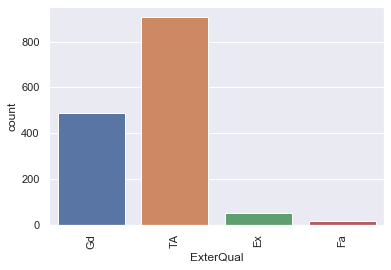

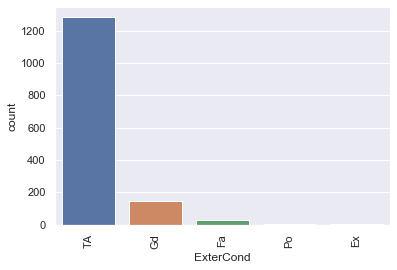

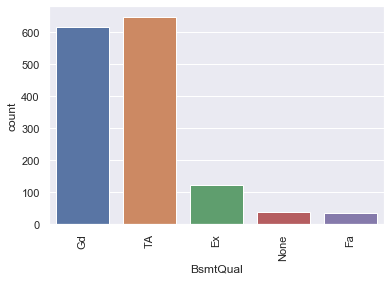

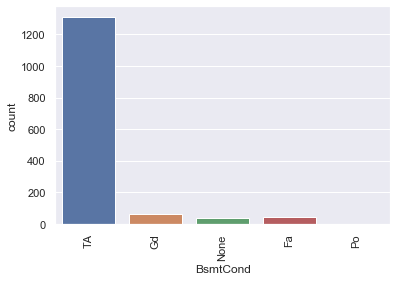

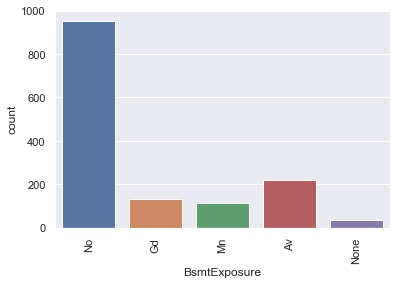

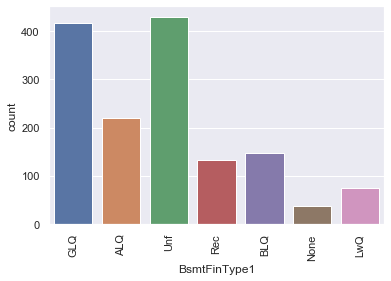

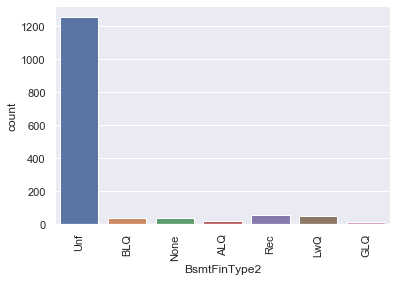

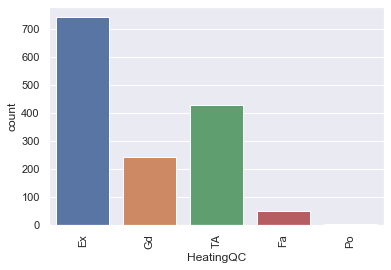

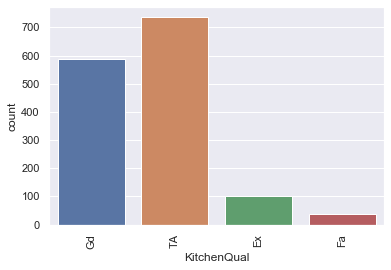

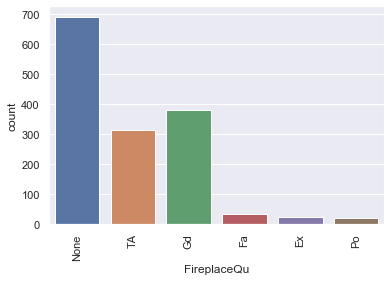

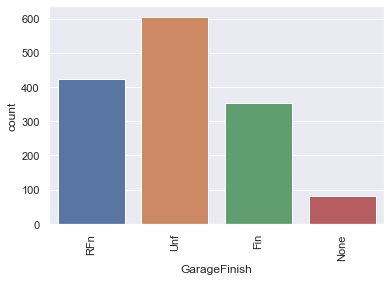

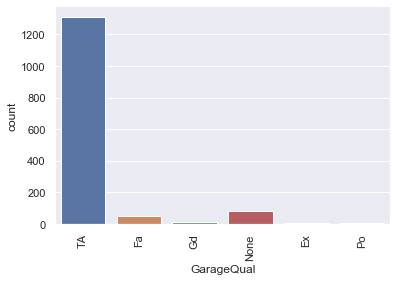

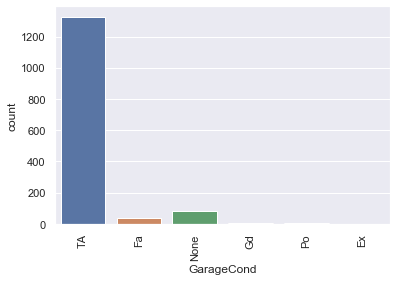

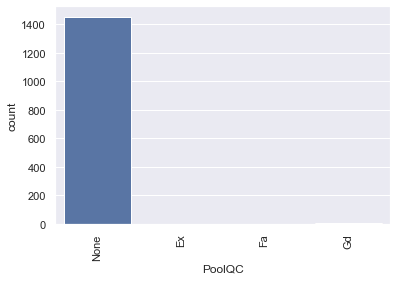

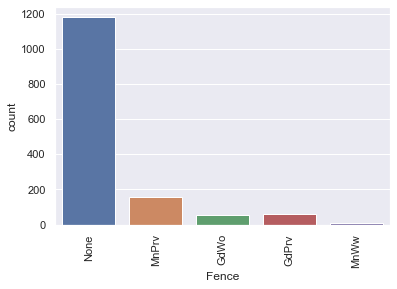

In [554]:
for i in ordinal_category_column :
    plt.figure()
    sns.countplot(data=housingDataSet, x = i)
    plt.xticks(rotation=90)
    plt.show()

In [555]:
data_numeric = housingDataSet.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## Descriptive Analysis conclusion
- Some neighbourhood are highly priced
- overquality is directly proportional to the salePrice

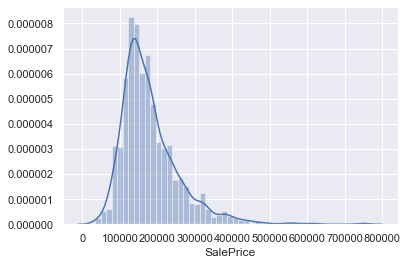

In [556]:
sns.distplot(housingDataSet['SalePrice'])

As the Data Price is Skewed slightly left, we will apply log transformation to centralized the target variable sale Price

In [557]:


#Log Transformation
housingDataSet['SalePrice']=np.log1p(housingDataSet['SalePrice'])



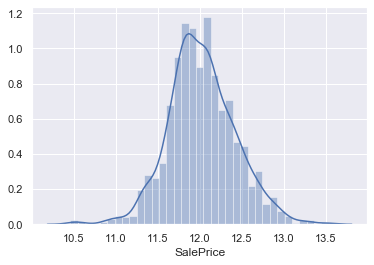

In [558]:


sns.distplot(housingDataSet['SalePrice'])



In [559]:
# correlation matrix
data_numeric = housingDataSet.select_dtypes(include=['float64', 'int64'])
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.073959     0.355879  0.257320     0.817185    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

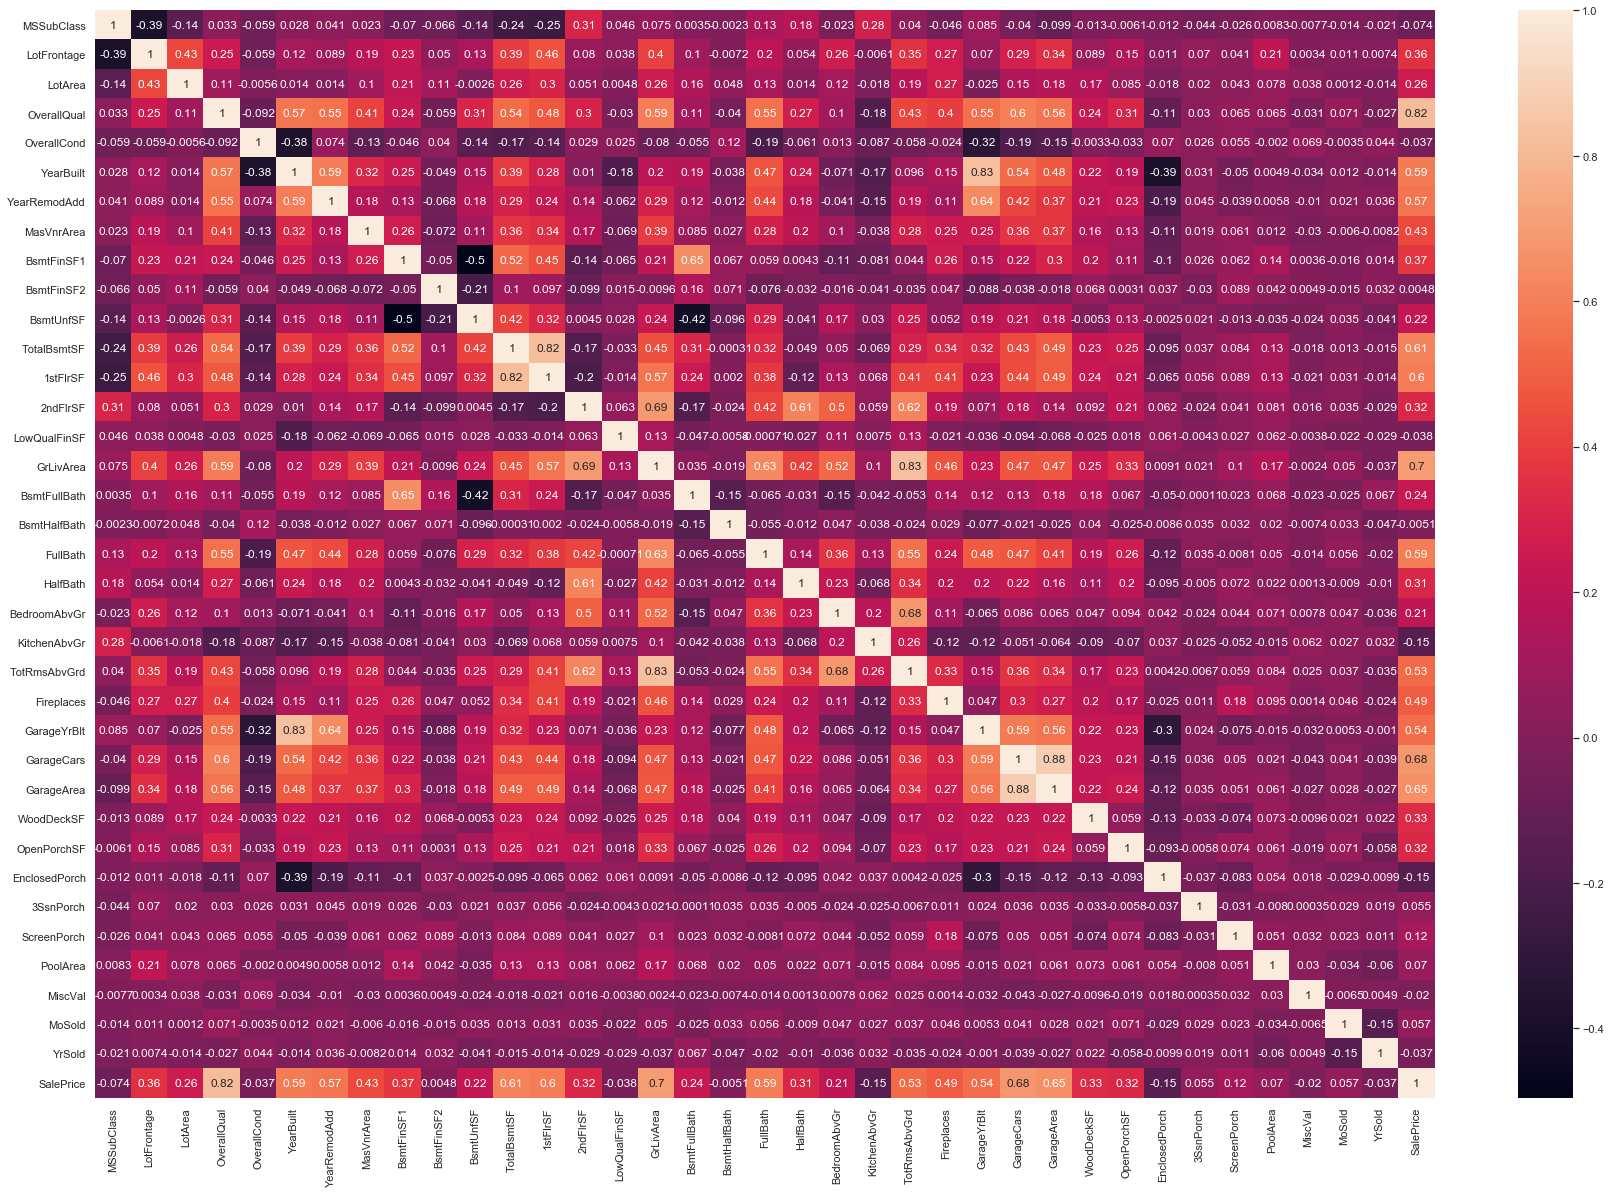

In [560]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

### We can see that some of the variables are correlated
### Before dropping these columns, we will first check their predictive power

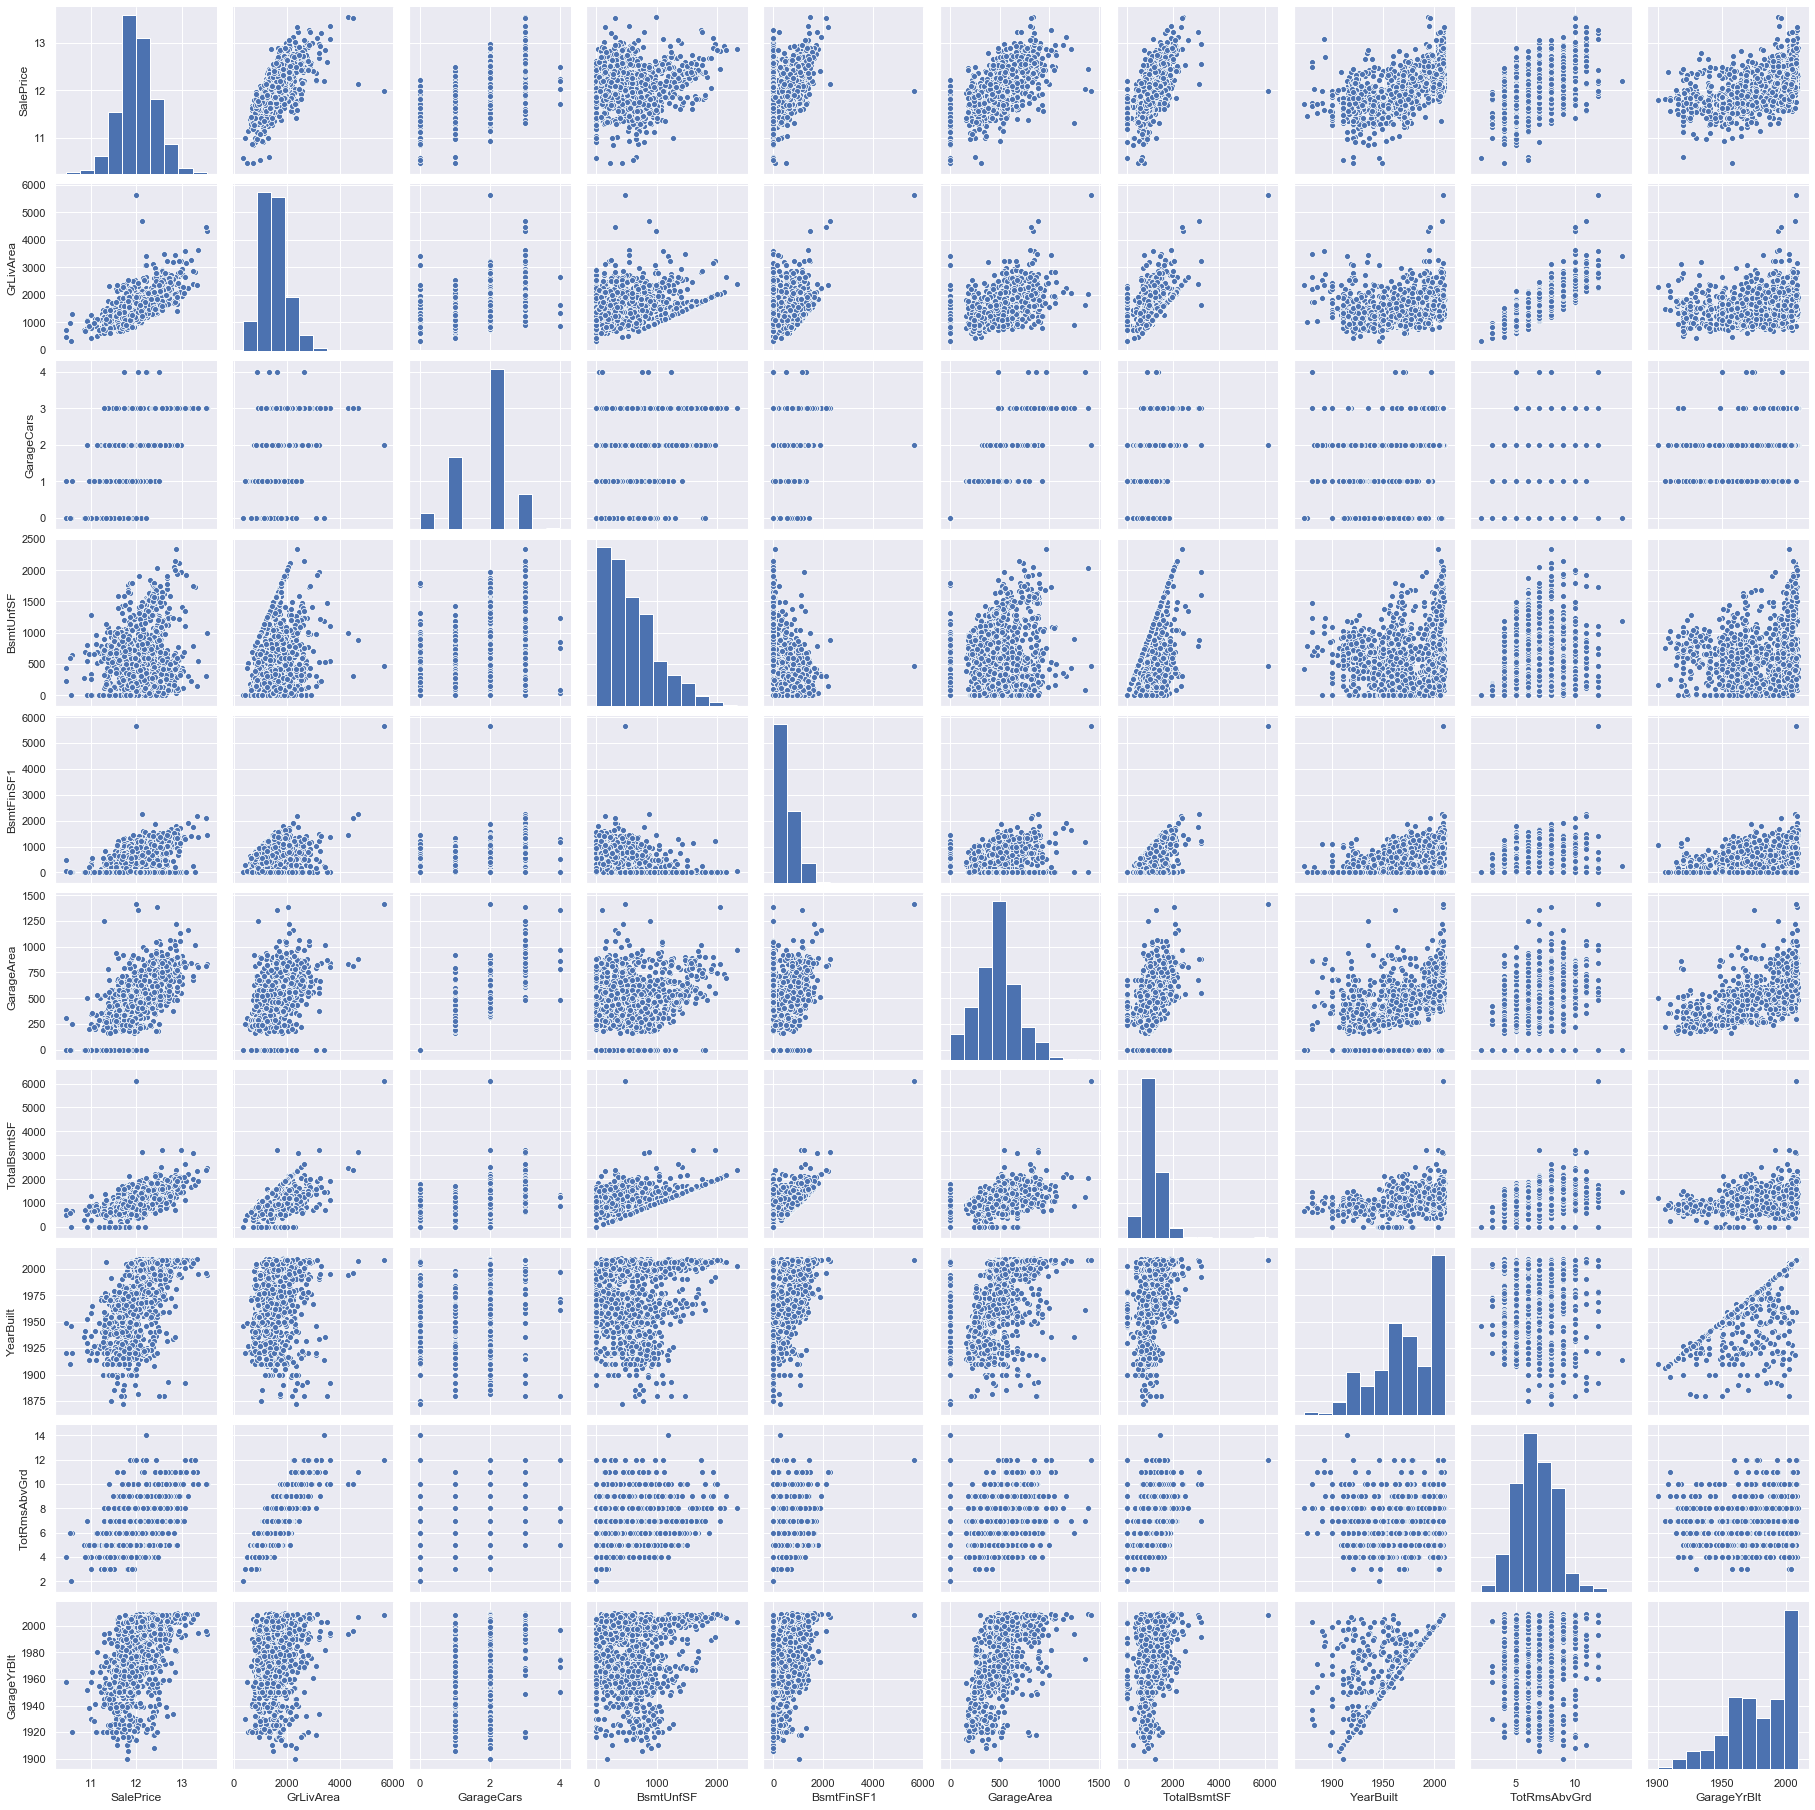

In [561]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housingDataSet[cols], size = 2.5)
plt.show()

In [562]:
housingDataSet = housingDataSet.drop(['GarageCars'], axis = 1)
housingDataSet = housingDataSet.drop(['BsmtUnfSF'], axis = 1)
housingDataSet = housingDataSet.drop(['TotRmsAbvGrd'], axis = 1)
housingDataSet = housingDataSet.drop(['GarageYrBlt'], axis = 1)    

housingDataSet.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1          TA  

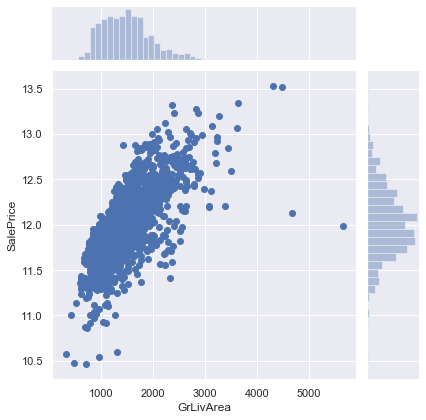

In [563]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housingDataSet)
plt.show()

In [564]:
print(housingDataSet['GrLivArea'].describe())

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Interquartile Spread is in between 1130 to 1776 for GrLivArea


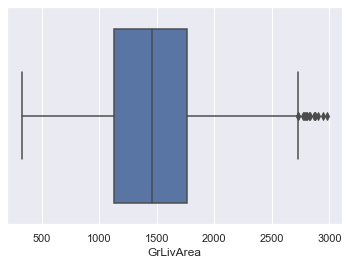

In [565]:
# Removing some outliers on lower right side of 'GrLivArea'


print(housingDataSet['GrLivArea'].describe())

#Checking loan_amnt after filtering outliers
filt = (housingDataSet['GrLivArea'] < 3000)
filtered_data = housingDataSet[filt]
print(housingDataSet['GrLivArea'].describe())

print('\nInterquartile Spread is in between 1130 to 1776 for GrLivArea')
sns.boxplot(x='GrLivArea',data=filtered_data)
plt.show()

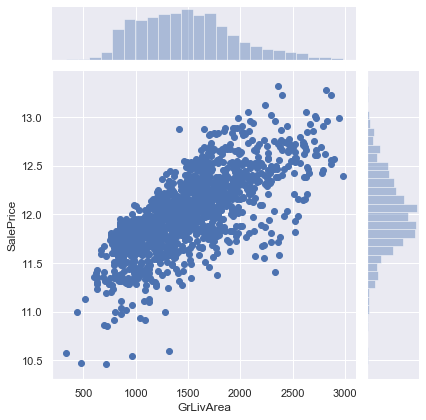

In [566]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = filtered_data['GrLivArea'], y = filtered_data['SalePrice'])
plt.show()

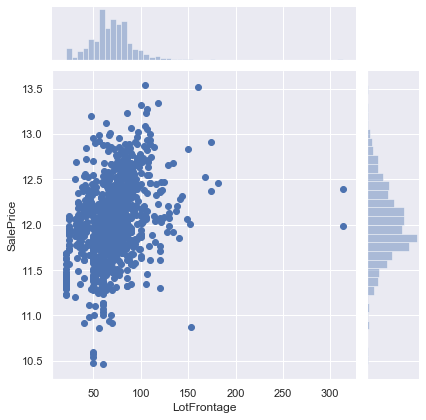

In [567]:
# Lot frontage vs SalePrice 
sns.jointplot(x = housingDataSet['LotFrontage'], y = housingDataSet['SalePrice'])
plt.show()

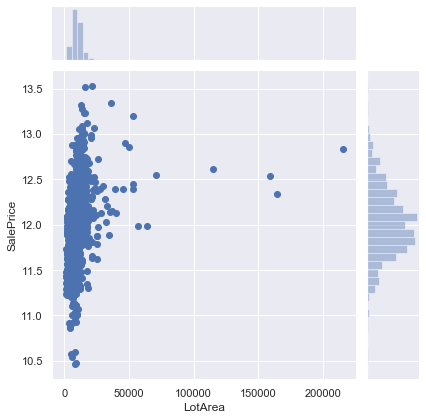

In [568]:
# LotArea vs SalePrice
sns.jointplot(x = housingDataSet['LotArea'], y = housingDataSet['SalePrice'])
plt.show()

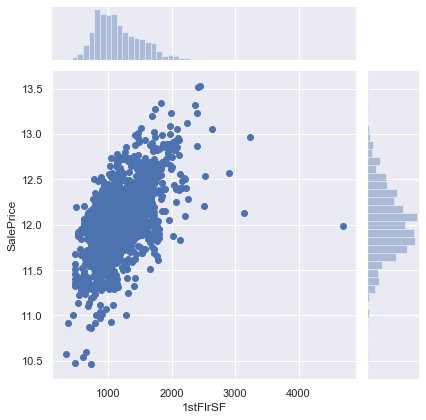

In [569]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = housingDataSet['1stFlrSF'], y = housingDataSet['SalePrice'])
plt.show()

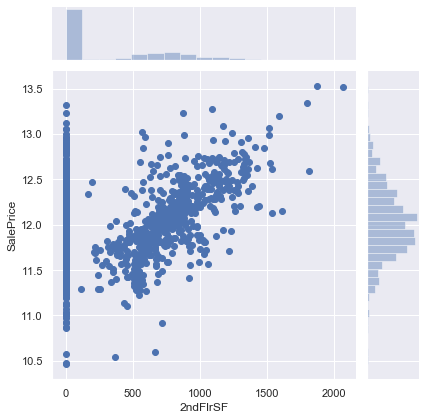

In [570]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = housingDataSet['2ndFlrSF'], y = housingDataSet['SalePrice'])
plt.show()

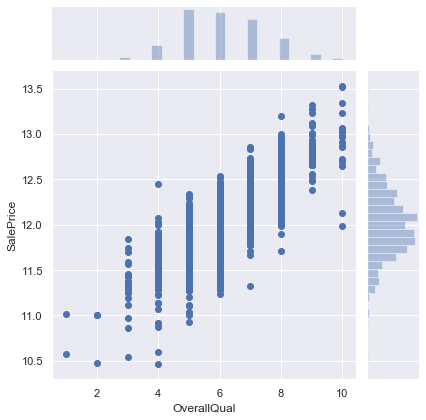

In [571]:
# OverallQual vs SalePrice
sns.jointplot(x = housingDataSet['OverallQual'], y = housingDataSet['SalePrice'])
plt.show()

## Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

In [572]:
# PropAge -  Property Age from yearsold - yearbuilt
housingDataSet['PropAge'] = (housingDataSet['YrSold'] - housingDataSet['YearBuilt'])
housingDataSet.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1          TA  

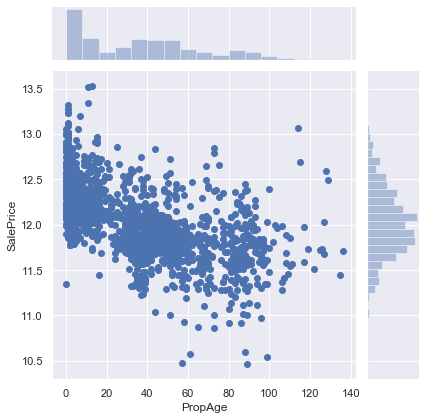

In [573]:
# PropAge vs SalePrice
sns.jointplot(x = housingDataSet['PropAge'], y = housingDataSet['SalePrice'])
plt.show()

In [574]:
### Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

In [575]:
housingDataSet = housingDataSet.drop(['MoSold'], axis = 1)
housingDataSet = housingDataSet.drop(['YrSold'], axis = 1)
housingDataSet = housingDataSet.drop(['YearBuilt'], axis = 1)
housingDataSet = housingDataSet.drop(['YearRemodAdd'], axis = 1)
housingDataSet.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        None     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA     Attchd          RFn   

In [576]:


# We can also drop columns that show very low variance and thus not required for predictions
housingDataSet = housingDataSet.drop(['Street'], axis = 1)
housingDataSet = housingDataSet.drop(['Utilities'], axis = 1)
housingDataSet = housingDataSet.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


In [577]:
housingDataSet.shape

(1460, 62)


## Data Preparation

In [578]:
numerical_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']

In [579]:
categorical_features = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']

## Creating Dummy columns to convert categorical into numerical

In [580]:
housingDataSet = pd.get_dummies(housingDataSet, drop_first=True )
housingDataSet.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropAge  \
0              0          0            0         0  12.247699        5   
1              0          0            0         0  12.109016       31   
2              0          0            0         0  12.317171        7   
3            272          0            0         0  11.849405       91   
4              0          0            0         0  12.429220        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighb

In [581]:
X = housingDataSet.drop(['SalePrice'], axis=1)
X['LotFrontage'] = X['LotFrontage'].fillna(X['LotFrontage'].median())
X['MasVnrArea'] = X['MasVnrArea'].fillna(X['MasVnrArea'].median())
X.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 210, dtype: int64

In [582]:


# Putting response variable to y
y = housingDataSet['SalePrice']




In [583]:


# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [584]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [585]:
y_train.shape

(1021,)

In [586]:
X_train.shape

(1021, 210)

In [587]:
X_train.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 210, dtype: int64

In [588]:
X_test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436   -0.839065    -0.482282 -0.173195    -1.574844     0.377745   -0.609112   
57      0.169194     0.842534  0.114799     0.657459    -0.483986   -0.609112   
780    -0.839065    -0.345232 -0.295688     0.657459    -0.483986   -0.378003   
382     0.169194     0.385701 -0.146519     0.657459    -0.483986   -0.609112   
1170    0.673324     0.248651 -0.077379    -0.086642     0.377745   -0.609112   
...          ...          ...       ...          ...          ...         ...   
509    -0.839065     0.431384 -0.107866    -0.830743     0.377745    0.193688   
555    -0.208903    -0.573649 -0.458467    -0.830743     0.377745   -0.609112   
399     0.169194    -0.253866 -0.268467     0.657459    -0.483986   -0.000930   
545    -0.082871    -0.071132  0.353469     0.657459    -0.483986    0.473452   
266     0.169194    -0.025449  0.067108    -0.086642    -0.483986   -0.609112   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1436    0.420867   -0.281532    -0.473033 -0.795529 -0.810589     -0.110778   
57     -0.996087   -0.281532    -0.483360 -0.806680  1.148506     -0.110778   
780    -0.996087   -0.281532     0.489962  0.288934 -0.810589     -0.110778   
382    -0.996087   -0.281532    -0.279402 -0.586442  1.143950     -0.110778   
1170    0.204644   -0.281532     0.125934 -0.087422 -0.810589     -0.110778   
...          ...         ...          ...       ...       ...           ...   
509     1.283461   -0.281532    -0.016062 -0.302084 -0.810589     -0.110778   
555    -0.996087   -0.281532    -0.139987 -0.282570 -0.810589     -0.110778   
399     0.871716   -0.281532     0.115607 -0.104149  0.187182     -0.110778   
545     1.308764    1.199107     0.404764  0.634625  1.025493     -0.110778   
266     0.646292   -0.281532    -0.633102 -0.968374  0.804525     -0.110778   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1436  -1.268092     -0.778198     -0.225306 -1.023721 -0.782546      0.133271   
57     0.410443     -0.778198     -0.225306  0.799002  1.187312      0.133271   
780   -0.505300     -0.778198     -0.225306  0.799002 -0.782546      0.133271   
382    0.561432     -0.778198     -0.225306  0.799002  1.187312      0.133271   
1170  -0.770022      1.215081     -0.225306 -1.023721 -0.782546      0.133271   
...         ...           ...           ...       ...       ...           ...   
509   -0.921012      1.215081     -0.225306 -1.023721 -0.782546      0.133271   
555   -0.907286     -0.778198     -0.225306 -1.023721 -0.782546     -1.108699   
399    0.077089      1.215081     -0.225306  0.799002 -0.782546     -1.108699   
545    1.318342     -0.778198     -0.225306  0.799002  1.187312      1.375241   
266    0.000613      1.215081     -0.225306  0.799002  1.187312      0.133271   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
1436     -0.152394   -1.011862    0.238541   -0.771409    -0.690864   
57       -0.152394   -1.011862    0.409443   -0.771409     0.362909   
780      -0.152394    0.548686   -0.343449    0.956863    -0.374732   
382      -0.152394   -1.011862    0.751247    0.359824     0.106993   
1170     -0.152394    0.548686   -0.546683    0.823315    -0.690864   
...            ...         ...         ...         ...          ...   
509      -0.152394   -1.011862   -0.953152    0.988287     0.633879   
555      -0.152394    0.548686   -0.906963   -0.771409    -0.690864   
399      -0.152394   -1.011862   -0.177166   -0.771409     1.838191   
545      -0.152394   -1.011862    1.430235   -0.771409    -0.690864   
266      -0.152394    0.548686   -0.292640   -0.025110     0.438178   

      EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   PropAge  MSZoning_FV  \
1436      -0.336016  -0.105612    -0.267159  -0.082098 -0.018659            0   
57        -0.336016  -0.105612    -0.267159  -0.082098 -1.152815            0   
780       -0.33

### Model Building and Evaluation
### Lets first check the model using Linear Regression and RFE

In [591]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [592]:


# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)



In [593]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 25),
 ('LotFrontage', False, 61),
 ('LotArea', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 96),
 ('BsmtFinSF1', False, 28),
 ('BsmtFinSF2', False, 107),
 ('TotalBsmtSF', False, 93),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 18),
 ('BsmtHalfBath', False, 98),
 ('FullBath', False, 48),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 17),
 ('KitchenAbvGr', False, 91),
 ('Fireplaces', False, 88),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 103),
 ('EnclosedPorch', False, 85),
 ('3SsnPorch', False, 78),
 ('ScreenPorch', False, 83),
 ('PoolArea', False, 73),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 6),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 65),
 ('LandContour_HLS', True, 1),
 ('

In [594]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1

In [595]:


X_train.columns[~rfe.support_]



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageFinish_RFn', 'GarageQual_Gd', 'GarageQual_TA', 'PavedDrive_Y',
       'MiscFeature_None', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD'],
      dtype='object', length=110)

In [596]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [597]:


X_train_rfe = pd.DataFrame(X_train[col])



In [598]:
X_train_rfe.head()

OverallQual  OverallCond  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
210     -0.779861     0.383154 -0.765065 -0.787597     -0.124502  -1.228053   
318      0.649651    -0.533005  0.511914  2.140556     -0.124502   2.123103   
239     -0.065105    -1.449164 -0.930972  0.795996     -0.124502  -0.056465   
986     -0.065105     2.215472 -0.420683  0.669584     -0.124502   0.221858   
1416    -1.494617     0.383154  0.195183  1.611926     -0.124502   1.453624   

      GarageArea   PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210    -2.217786  1.529604            0            0            1   
318     0.867506 -0.677573            0            0            1   
239    -1.183084  0.936631            0            0            1   
986    -1.018473  1.957862            0            0            0   
1416    0.416000  2.913207            0            0            0   

      MSZoning_RM  LotShape_IR3  LandContour_HLS  LandContour_Low  \
210             0             0                0                0   
318             0             0                0                1   
239             0             0                0                0   
986             1             0                0                0   
1416            1             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LandSlope_Mod  LandSlope_Sev  \
210                 1                  0              0              0   
318                 0                  0              1              0   
239                 1                  0              0              0   
986                 1                  0              0              0   
1416                1                  0              0              0   

      Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_Crawfor  \
210                     0                     0                     0   
318                     0                     0                     0   
239                     0                     0                     0   
986                     0                     0                     0   
1416                    0                     0                     0   

      Neighborhood_Edwards  Neighborhood_MeadowV  Neighborhood_Mitchel  \
210                      1                     0                     0   
318                      0                     0                     0   
239                      1                     0                     0   
986                      0                     0                     0   
1416                     0                     0                     0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_SWISU  \
210                      0                     0                   0   
318                      1                     0                   0   
239                      0                     0                   0   
986                      0                     0                   0   
1416                     0                     0                   0   

      Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
210                      0                     0                    0   
318                      0                     0                    0   
239                      0                     0                    0   
986                      0                     0                    0   
1416                     0                     0                    0   

      Neighborhood_Veenker  Condition1_Norm  Condition1_PosA  Condition1_RRAn  \
210                      0                1                0                0   
318                      0                1                0                0   
239                      0                1                0                0   
986                      0                0                0                0   
1416                     0                1                0                0   

      Conditi

In [599]:


X_train_rfe.shape



(1021, 100)

In [602]:


# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)



0.9257817524019942

In [603]:


y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)



-8.194669031887638e+19

## Test R2 value is too low, we will proceed with regression with regularization

In [605]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 25),
 ('LotFrontage', False, 61),
 ('LotArea', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 96),
 ('BsmtFinSF1', False, 28),
 ('BsmtFinSF2', False, 107),
 ('TotalBsmtSF', False, 93),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 18),
 ('BsmtHalfBath', False, 98),
 ('FullBath', False, 48),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 17),
 ('KitchenAbvGr', False, 91),
 ('Fireplaces', False, 88),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 103),
 ('EnclosedPorch', False, 85),
 ('3SsnPorch', False, 78),
 ('ScreenPorch', False, 83),
 ('PoolArea', False, 73),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 6),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 65),
 ('LandContour_HLS', True, 1),
 ('

In [606]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1

In [607]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

OverallQual  OverallCond  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1436    -1.574844     0.377745 -0.795529 -0.810589     -0.110778  -1.268092   
57       0.657459    -0.483986 -0.806680  1.148506     -0.110778   0.410443   
780      0.657459    -0.483986  0.288934 -0.810589     -0.110778  -0.505300   
382      0.657459    -0.483986 -0.586442  1.143950     -0.110778   0.561432   
1170    -0.086642     0.377745 -0.087422 -0.810589     -0.110778  -0.770022   

      GarageArea   PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1436    0.238541 -0.018659            0            0            1   
57      0.409443 -1.152815            0            0            1   
780    -0.343449 -0.819240            0            0            1   
382     0.751247 -1.186173            0            0            1   
1170   -0.546683 -0.185447            0            0            1   

      MSZoning_RM  LotShape_IR3  LandContour_HLS  LandContour_Low  \
1436            0             0                0                0   
57              0             0                0                0   
780             0             0                0                0   
382             0             0                0                0   
1170            0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LandSlope_Mod  LandSlope_Sev  \
1436                1                  0              0              0   
57                  1                  0              0              0   
780                 1                  0              0              0   
382                 1                  0              0              0   
1170                1                  0              0              0   

      Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_Crawfor  \
1436                    0                     0                     0   
57                      0                     0                     0   
780                     0                     0                     0   
382                     0                     0                     0   
1170                    0                     0                     0   

      Neighborhood_Edwards  Neighborhood_MeadowV  Neighborhood_Mitchel  \
1436                     0                     0                     0   
57                       0                     0                     0   
780                      0                     0                     0   
382                      0                     0                     0   
1170                     0                     0                     1   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_SWISU  \
1436                     0                     0                   0   
57                       0                     0                   0   
780                      0                     0                   0   
382                      0                     0                   0   
1170                     0                     0                   0   

      Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
1436                     0                     0                    0   
57                       0                     0                    0   
780                      0                     0                    0   
382                      0                     0                    0   
1170                     0                     0                    0   

      Neighborhood_Veenker  Condition1_Norm  Condition1_PosA  Condition1_RRAn  \
1436                     0                1                0                0   
57                       0                1                0                0   
780                      0                1                0                0   
382                      0                1                0                0   
1170                     0                1                0                0   

      Conditi

# Lasso and Ridge Regression

In [608]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 210)
y_train (1021,)


In [609]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [610]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.308  1.117856e-01            0.002        0.004000      0.0001   
1          0.048  4.000068e-03            0.000        0.000000       0.001   
2          0.012  4.000020e-03            0.002        0.004000        0.01   
3          0.010  2.336015e-07            0.000        0.000000        0.05   
4          0.010  2.336015e-07            0.006        0.004899         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099865          -0.094593          -0.101486   
1   {'alpha': 0.001}          -0.093068          -0.097334          -0.098397   
2    {'alpha': 0.01}          -0.096091          -0.108943          -0.107730   
3    {'alpha': 0.05}          -0.120552          -0.135973          -0.131309   
4     {'alpha': 0.1}          -0.158579          -0.171250          -0.162416   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085086          -0.097553        -0.095721        0.005798   
1          -0.078988          -0.090270        -0.091613        0.006955   
2          -0.093467          -0.098699        -0.100981        0.006236   
3          -0.128008          -0.130461        -0.129252        0.005067   
4          -0.159239          -0.164007        -0.163094        0.004540   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.075178           -0.065992   
1                1           -0.083018           -0.073908   
2                3           -0.100155           -0.089127   
3                4           -0.131476           -0.118215   
4                5           -0.163635           -0.156282   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.070541           -0.078052           -0.076501   
1           -0.077269           -0.085561           -0.083327   
2           -0.096283           -0.101755           -0.101932   
3           -0.126223           -0.130220           -0.132536   
4           -0.160419           -0.162155           -0.167020   

   mean_train_score  std_train_score  
0         -0.073253         0.004413  
1         -0.080617         0.004331  
2         -0.097851         0.004812  
3         -0.127734         0.005218  
4         -0.161902         0.003551

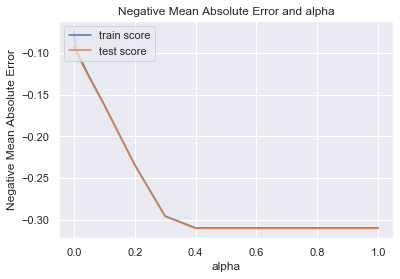

In [611]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
### but we will choose a low value of alpha to balance the trade-off between Bias-Variance
### and to get the coefficients of smallest of features

In [612]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02029152,  0.        ,  0.00962146,  0.13108207,  0.04065625,
        0.        ,  0.        ,  0.        ,  0.0207728 ,  0.00579834,
        0.        , -0.        ,  0.10836534,  0.03315306,  0.        ,
        0.01726942,  0.00113395,  0.        , -0.00298599,  0.03244081,
        0.04527242,  0.01406621,  0.        ,  0.        ,  0.        ,
        0.00446666, -0.01727476, -0.09115308,  0.        ,  0.        ,
        0.00300742, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [613]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.018),
 ('MSSubClass', -0.02),
 ('LotFrontage', 0.0),
 ('LotArea', 0.01),
 ('OverallQual', 0.131),
 ('OverallCond', 0.041),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.021),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.108),
 ('BsmtFullBath', 0.033),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.017),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.032),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.004),
 ('PoolArea', -0.017),
 ('PropAge', -0.091),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.003),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3',

In [614]:


# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))



0.8542223711808745
0.8597603968379117


In [615]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15190369402337428


#### The R2 values for Train and Test matches well, indicating an optimum model

In [618]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))


params = pd.DataFrame(mod)
params.columns = ['Variable', 'Coeff']
params



Variable   Coeff
0                 constant  12.018
1               MSSubClass  -0.020
2              LotFrontage   0.000
3                  LotArea   0.010
4              OverallQual   0.131
..                     ...     ...
206  SaleCondition_AdjLand  -0.000
207   SaleCondition_Alloca  -0.000
208   SaleCondition_Family  -0.000
209   SaleCondition_Normal   0.000
210  SaleCondition_Partial   0.000

[211 rows x 2 columns]

In [619]:
# sort the coefficients in ascending order
ordered_params = params.sort_values((['Coeff']), axis = 0, ascending = False)
ordered_params

Variable   Coeff
0        constant  12.018
4     OverallQual   0.131
13      GrLivArea   0.108
21     GarageArea   0.045
5     OverallCond   0.041
..            ...     ...
164  HeatingQC_TA  -0.002
19   KitchenAbvGr  -0.003
27       PoolArea  -0.017
1      MSSubClass  -0.020
28        PropAge  -0.091

[211 rows x 2 columns]

In [621]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(params[(params['Coeff'] != 0)])
pred

Variable   Coeff
0             constant  12.018
1           MSSubClass  -0.020
3              LotArea   0.010
4          OverallQual   0.131
5          OverallCond   0.041
9          TotalBsmtSF   0.021
10            1stFlrSF   0.006
13           GrLivArea   0.108
14        BsmtFullBath   0.033
16            FullBath   0.017
17            HalfBath   0.001
19        KitchenAbvGr  -0.003
20          Fireplaces   0.032
21          GarageArea   0.045
22          WoodDeckSF   0.014
26         ScreenPorch   0.004
27            PoolArea  -0.017
28             PropAge  -0.091
31         MSZoning_RL   0.003
164       HeatingQC_TA  -0.002
178  GarageType_Attchd   0.004

In [623]:
# These 21 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(21, 2)

In [624]:


Lassso_var = list(pred['Variable'])
print(Lassso_var)



['constant', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'PropAge', 'MSZoning_RL', 'HeatingQC_TA', 'GarageType_Attchd']


In [625]:
X_train_lasso = X_train[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'PropAge', 'MSZoning_RL', 'HeatingQC_TA', 'GarageType_Attchd']]
                        
X_train_lasso.head()

MSSubClass   LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
210    -0.657071 -0.473765    -0.779861     0.383154    -0.430911 -0.765065   
318     0.035976 -0.056845     0.649651    -0.533005     0.621579  0.511914   
239    -0.195040 -0.169324    -0.065105    -1.449164    -0.712011 -0.930972   
986    -0.195040 -0.502297    -0.065105     2.215472    -1.256778 -0.420683   
1416    3.039179  0.082905    -1.494617     0.383154    -0.620490  0.195183   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  KitchenAbvGr  Fireplaces  \
210   -1.228053      1.066863 -1.026085 -0.751723     -0.234155   -0.925422   
318    2.123103      1.066863  0.786428  1.246998     -0.234155    0.623522   
239   -0.056465     -0.837450 -1.026085  1.246998     -0.234155    0.623522   
986    0.221858     -0.837450 -1.026085 -0.751723     -0.234155   -0.925422   
1416   1.453624     -0.837450  0.786428 -0.751723      4.112612   -0.925422   

      GarageArea  WoodDeckSF  ScreenPorch  PoolArea   PropAge  MSZoning_RL  \
210    -2.217786   -0.743160    -0.275126 -0.062302  1.529604            1   
318     0.867506    1.989482    -0.275126 -0.062302 -0.677573            1   
239    -1.183084   -0.743160    -0.275126 -0.062302  0.936631            1   
986    -1.018473    2.423490    -0.275126 -0.062302  1.957862            0   
1416    0.416000   -0.743160    -0.275126 -0.062302  2.913207            0   

      HeatingQC_TA  GarageType_Attchd  
210              1                  0  
318              0                  1  
239              1                  0  
986              0                  1  
1416             0                  0

In [626]:


X_train_lasso.shape



(1021, 20)

In [627]:


X_test_lasso = X_test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'PropAge', 'MSZoning_RL', 'HeatingQC_TA', 'GarageType_Attchd']]
                        
X_test_lasso.head()



MSSubClass   LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
1436   -0.839065 -0.173195    -1.574844     0.377745    -0.473033 -0.795529   
57      0.169194  0.114799     0.657459    -0.483986    -0.483360 -0.806680   
780    -0.839065 -0.295688     0.657459    -0.483986     0.489962  0.288934   
382     0.169194 -0.146519     0.657459    -0.483986    -0.279402 -0.586442   
1170    0.673324 -0.077379    -0.086642     0.377745     0.125934 -0.087422   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  KitchenAbvGr  Fireplaces  \
1436  -1.268092     -0.778198 -1.023721 -0.782546     -0.152394   -1.011862   
57     0.410443     -0.778198  0.799002  1.187312     -0.152394   -1.011862   
780   -0.505300     -0.778198  0.799002 -0.782546     -0.152394    0.548686   
382    0.561432     -0.778198  0.799002  1.187312     -0.152394   -1.011862   
1170  -0.770022      1.215081 -1.023721 -0.782546     -0.152394    0.548686   

      GarageArea  WoodDeckSF  ScreenPorch   PoolArea   PropAge  MSZoning_RL  \
1436    0.238541   -0.771409    -0.267159  -0.082098 -0.018659            1   
57      0.409443   -0.771409    -0.267159  -0.082098 -1.152815            1   
780    -0.343449    0.956863    -0.267159  -0.082098 -0.819240            1   
382     0.751247    0.359824    -0.267159  -0.082098 -1.186173            1   
1170   -0.546683    0.823315    -0.267159  11.217615 -0.185447            1   

      HeatingQC_TA  GarageType_Attchd  
1436             1                  0  
57               0                  1  
780              0                  1  
382              0                  1  
1170             1                  1

# Ridge Regression

In [629]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [630]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.122  2.140471e-01            0.002        0.004000      0.0001   
1          0.010  1.507891e-07            0.004        0.004899       0.001   
2          0.010  9.536743e-08            0.002        0.004000        0.01   
3          0.012  4.000115e-03            0.000        0.000000        0.05   
4          0.010  2.336015e-07            0.004        0.004899         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.105665          -0.098062          -0.107122   
1   {'alpha': 0.001}          -0.105651          -0.098057          -0.107103   
2    {'alpha': 0.01}          -0.105518          -0.098010          -0.106923   
3    {'alpha': 0.05}          -0.104985          -0.097822          -0.106234   
4     {'alpha': 0.1}          -0.104482          -0.097643          -0.105579   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.098109          -0.106870        -0.103168        0.004176   
1          -0.098055          -0.106841        -0.103144        0.004180   
2          -0.097531          -0.106559        -0.102911        0.004222   
3          -0.095585          -0.105451        -0.102018        0.004411   
4          -0.093753          -0.104313        -0.101157        0.004641   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.074569           -0.064793   
1               26           -0.074567           -0.064794   
2               25           -0.074543           -0.064797   
3               24           -0.074477           -0.064810   
4               23           -0.074443           -0.064840   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.069460           -0.077370           -0.075413   
1           -0.069459           -0.077370           -0.075415   
2           -0.069454           -0.077374           -0.075426   
3           -0.069445           -0.077414           -0.075479   
4           -0.069481           -0.077477           -0.075555   

   mean_train_score  std_train_score  
0         -0.072321         0.004582  
1         -0.072321         0.004582  
2         -0.072319         0.004581  
3         -0.072325         0.004588  
4         -0.072359         0.004595

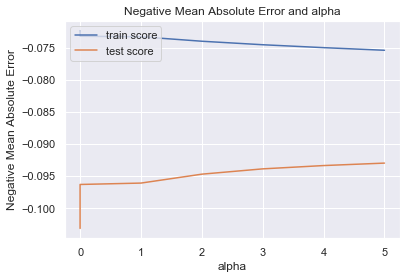

In [631]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [632]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.17224873e-02, -1.29690110e-02,  2.10852926e-02,  7.41781064e-02,
        4.34500144e-02, -4.79221915e-03, -1.38424967e-02,  3.82990720e-03,
        7.77201867e-03,  3.75128740e-02,  4.80936299e-02,  2.56539349e-03,
        6.76468054e-02,  2.90092318e-02,  4.16233794e-03,  2.02415119e-02,
        1.63200622e-02,  2.10158761e-02, -9.00603398e-03, -4.51693687e-03,
        3.37355825e-02,  1.30591182e-02, -2.47912637e-03,  8.51492978e-03,
        9.45078159e-03,  9.66708381e-03, -1.33525611e-02, -3.31869747e-02,
        1.25167323e-01,  1.46485668e-01,  1.51333977e-01,  1.29803512e-01,
        3.14670207e-02, -4.97708343e-02,  9.50539921e-03,  6.73957314e-02,
        7.43406580e-02,  7.98459071e-02,  3.35396210e-02, -5.11007298e-02,
       -3.98438203e-02, -1.12704046e-02,  2.48372490e-02, -4.72622892e-02,
       -1.93582410e-02, -6.56259115e-02, -1.77395677e-03,  7.50994719e-02,
       -9.96609832e-03,  1.39630672e-01, -1.01258169e-01, -3.91228565e-03,
       -1.00188828e-01, -

In [633]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.674),
 ('MSSubClass', -0.022),
 ('LotFrontage', -0.013),
 ('LotArea', 0.021),
 ('OverallQual', 0.074),
 ('OverallCond', 0.043),
 ('MasVnrArea', -0.005),
 ('BsmtFinSF1', -0.014),
 ('BsmtFinSF2', 0.004),
 ('TotalBsmtSF', 0.008),
 ('1stFlrSF', 0.038),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.068),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.02),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.021),
 ('KitchenAbvGr', -0.009),
 ('Fireplaces', -0.005),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.002),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.009),
 ('ScreenPorch', 0.01),
 ('PoolArea', -0.013),
 ('PropAge', -0.033),
 ('MSZoning_FV', 0.125),
 ('MSZoning_RH', 0.146),
 ('MSZoning_RL', 0.151),
 ('MSZoning_RM', 0.13),
 ('LotShape_IR2', 0.031),
 ('LotShape_IR3', -0.05),
 ('LotShape_Reg', 0.01),
 ('LandContour_HLS', 0.067),
 ('LandContour_Low', 0.074),
 ('LandContour_Lvl', 0.08),
 ('LotConfig_CulDSac', 0.034),
 ('L

In [634]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9220741485635361
0.8822383367808098


In [635]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))



RMSE : 0.1391986308468254


### It is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [637]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [638]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.674
200        SaleType_ConLD   0.158
31            MSZoning_RL   0.151
30            MSZoning_RH   0.146
50   Neighborhood_Crawfor   0.140
60   Neighborhood_NridgHt   0.132
32            MSZoning_RM   0.130
29            MSZoning_FV   0.125
66   Neighborhood_StoneBr   0.114
65   Neighborhood_Somerst   0.110
95    Exterior1st_BrkFace   0.090
38        LandContour_Lvl   0.080
59   Neighborhood_NoRidge   0.080
70        Condition1_Norm   0.076
48   Neighborhood_ClearCr   0.075
4             OverallQual   0.074
37        LandContour_Low   0.074
13              GrLivArea   0.068
68   Neighborhood_Veenker   0.067
36        LandContour_HLS   0.067

In [639]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.674
200        SaleType_ConLD   0.158
31            MSZoning_RL   0.151
30            MSZoning_RH   0.146
50   Neighborhood_Crawfor   0.140
..                    ...     ...
79         BldgType_Twnhs  -0.075
172        KitchenQual_TA  -0.078
53    Neighborhood_IDOTRR  -0.100
51   Neighborhood_Edwards  -0.101
54   Neighborhood_MeadowV  -0.130

[211 rows x 2 columns]

In [640]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.674
200        SaleType_ConLD   0.158
31            MSZoning_RL   0.151
30            MSZoning_RH   0.146
50   Neighborhood_Crawfor   0.140
..                    ...     ...
79         BldgType_Twnhs  -0.075
172        KitchenQual_TA  -0.078
53    Neighborhood_IDOTRR  -0.100
51   Neighborhood_Edwards  -0.101
54   Neighborhood_MeadowV  -0.130

[202 rows x 2 columns]

In [641]:


predRFE.shape



(202, 2)


# Observation:
- Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
- it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.
- It is always advisable to use simple yet robust model.
- Equation can be formulated using the features and coefficients obtained by Lasso

In [642]:

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17','x18','x19','x20']), inplace = True) 
pred

Variable   Coeff
C             constant  12.018
x1          MSSubClass  -0.020
x2             LotArea   0.010
x3         OverallQual   0.131
x4         OverallCond   0.041
x5         TotalBsmtSF   0.021
x6            1stFlrSF   0.006
x7           GrLivArea   0.108
x8        BsmtFullBath   0.033
x9            FullBath   0.017
x10           HalfBath   0.001
x11       KitchenAbvGr  -0.003
x12         Fireplaces   0.032
x13         GarageArea   0.045
x14         WoodDeckSF   0.014
x15        ScreenPorch   0.004
x16           PoolArea  -0.017
x17            PropAge  -0.091
x18        MSZoning_RL   0.003
x19       HeatingQC_TA  -0.002
x20  GarageType_Attchd   0.004

# Observation
### These are the final features that should be selected for predicting the price of house
### Hence the equation:
### Log(Y) = 12.018 - 0.020(x1) + 0.010(x2) + 0.131(x3) + 0.041(x4)+0.021(x5) + 0.006(x6) + 0.108(x7) + 0.033(x8) + 0.017(x9) + 0.001(x10) - 0.003(x11)+ 0.032(x12) + 0.045(x13) + 0.014(x14) - 0.004(x15) - 0.017(x16) - 0.091(x17) + 0.003(x18)- 0.002(x19) + 0.004(x20)+ Error term(RSS + alpha * (sum of absolute value of coefficients)
## INFERENCE
### Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
#### The higher values of positive coeeficients suggest a high sale value.
#### The higher values of negative coeeficients suggest a decrease in sale value.
